In [3]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): w


In [93]:
m = 30

# Параметры пучка электронов и мишени
target = R(Material(m), 1e-2*(Material(m).M()/m))
beams_energy = 0.075625
brem = target.brem(beams_energy)
brem_e = brem * en

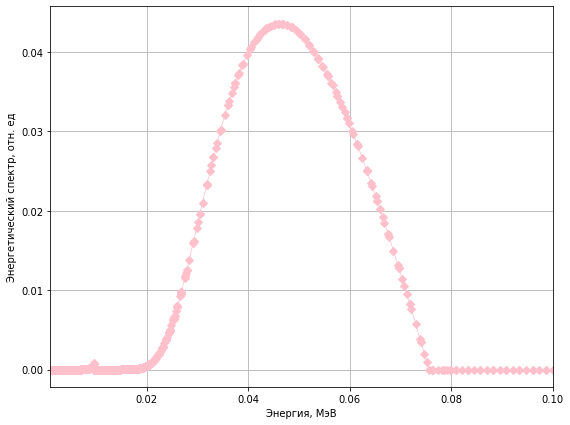

In [94]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(en, brem_e, ls='-', marker='D', lw='0.7', ms=5, color='pink')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.10e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

In [95]:
def rectangle_ideal(grid, material_num_1, material_num_2):
    signal = R(Material(1), 1).f()
    signal[:] = 0
    signal[Material(material_num_1).k_index() + 1:Material(material_num_2).k_index() + 1] = 1
    return signal

K = [Material(i).k_index() for i in range(11, 101)]
K.append(0)
resp_rectangle = [rectangle_ideal(en, i, i+1) for i in range(11, 100)]

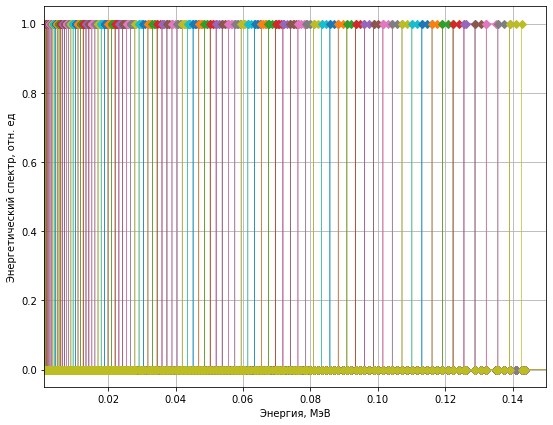

In [96]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_rectangle:
    ax.plot(en,i, ls='-', marker='D', lw='0.7', ms=5)
# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 1.5e-1)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

In [97]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [98]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

In [86]:
from garipov_deconvolution import get_coeff_simpson

In [87]:
signals_simpson = [sum(get_coeff_simpson(brem_e*r, en, EDGE)[0]) for r in resp_rectangle]

In [65]:
# signals_simpson_nonuniform = []

# for response in resp_rectangle:
#     signals_simpson_nonuniform.append(sum(get_coeff_simpson_nonuniform(response*brem_e, en, EDGE)[0]))

In [88]:
e1 = [Material(i).k_en() for i in range(11, 100)]
e2 = [val for val in e1]
e3 = (np.array(e2)+np.array(e1))/2

In [89]:
e3

array([0.001064 , 0.0012945, 0.0015499, 0.0018285, 0.0021304, 0.0024559,
       0.0028049, 0.0031776, 0.0035833, 0.004015 , 0.0044658, 0.0049406,
       0.0054396, 0.0059576, 0.0065109, 0.0070834, 0.0076807, 0.0083028,
       0.0089432, 0.0096224, 0.010331 , 0.011067 , 0.011829 , 0.012619 ,
       0.013435 , 0.01428  , 0.015159 , 0.016067 , 0.017    , 0.017962 ,
       0.018948 , 0.019965 , 0.021012 , 0.022087 , 0.023191 , 0.024321 ,
       0.025489 , 0.026688 , 0.027921 , 0.029184 , 0.030479 , 0.031805 ,
       0.033164 , 0.034556 , 0.035985 , 0.037449 , 0.038943 , 0.040456 ,
       0.04201  , 0.043597 , 0.045219 , 0.046876 , 0.048568 , 0.050303 ,
       0.05206  , 0.053861 , 0.055699 , 0.057574 , 0.059488 , 0.061441 ,
       0.063442 , 0.065482 , 0.067565 , 0.069689 , 0.071856 , 0.074066 ,
       0.076314 , 0.078615 , 0.08096  , 0.083353 , 0.085798 , 0.08829  ,
       0.090832 , 0.093424 , 0.096068 , 0.098764 , 0.10152  , 0.10432  ,
       0.10719  , 0.11011  , 0.11308  , 0.11611  , 

In [90]:
mean_spectrum = np.array(signals_simpson) / e3

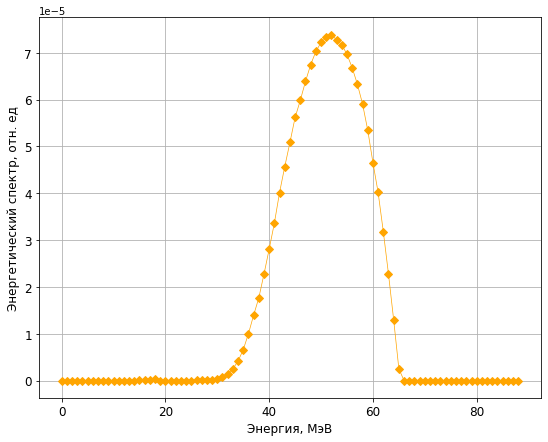

In [91]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(list(range(len(signals_simpson))), signals_simpson, ls='-', marker='D', lw='0.7', ms=5, color='orange')
# ax.plot(e3, mean_spectrum, ls='-', marker='D', lw='0.7', ms=5, color='orange')
# ax.plot(en, brem_e, ls='-', marker='D', lw='0.7', ms=5, color='pink')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 1e-1)
# ax.set_ylim(1e-15, 1.2)
ax.grid(True)

In [92]:
Matrix = [get_coeff_simpson(response, en, EDGE)[0] for response in resp_rectangle]

In [71]:
for l in Matrix:
    for j, val in enumerate(l):
        if val == 0:
            l[j] = np.nextafter(0, 1) * 1e20

In [72]:
from garipov_deconvolution import Gold

In [73]:
sp = [0 for i in range(len(signals_simpson))]
norm = [0 for i in range(len(signals_simpson))]
decb = [0 for i in range(len(signals_simpson))]
dev = [0 for i in range(len(signals_simpson))]

new_en = get_coeff_simpson(resp_rectangle[0], en, EDGE)[1]

In [74]:
import time
# восстановление спектра методом Голда на основании К-фильтров
start_time = time.time()
sp, norm, dev = Gold(Matrix, signals_simpson, en, brem_e, new_en, 1, 30000, w=True, d=False)[:3]

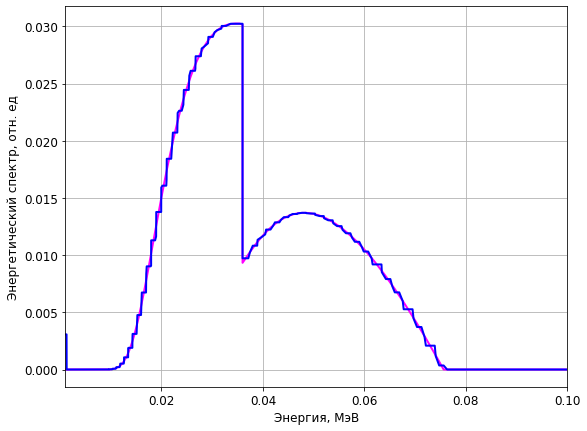

In [75]:
fig, ax = plt.subplots(figsize=(9, 7))

new_en = get_coeff_simpson(resp_rectangle[0], en, EDGE)[1]

ax.plot(en, brem_e, ls='-', lw='2', ms=5, color='magenta')
ax.plot(new_en, sp, ls='-', lw='2', ms=5, color='blue')


# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.10e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)